# Database Merging

### Databases used
1. APID
2. UNIPROT
3. ATLAS PROTEINS

We will combine these databases into one merged one. After combining the first 2 databases, I will then subset that merged data on the atlas proteins from the macrophages. This way we only get proteins that can be affected by Mtb.

In [79]:
# Import the necessary python packages that are needed to create dataframes
import pandas as pd
import numpy as np
import gzip

In [80]:
# Load in apid data into a dataframe
apid_data = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/macrophage/apid/9606_Q1.txt',
                         delimiter='\t')

apid_data.head()

InteractionID UniprotID_A     UniprotName_A GeneName_A UniprotID_B  \
0        1495672  A0A024R0Y4  A0A024R0Y4_HUMAN     TADA2A      Q8WWY3   
1        1591599  A0A024R4B0  A0A024R4B0_HUMAN     SPATA3      O15354   
2        1532709  A0A024R4Q5  A0A024R4Q5_HUMAN       TFPT      Q96D03   
3        1532710  A0A024R4Q5  A0A024R4Q5_HUMAN       TFPT      P51911   
4        1714250  A0A024R6G0  A0A024R6G0_HUMAN       TCL6      P50222   

  UniprotName_B GeneName_B  ExpEvidences  Methods  Publications  3DStructures  \
0   PRP31_HUMAN     PRPF31             1        3             1             0   
1   GPR37_HUMAN      GPR37             1        3             1             0   
2   DDT4L_HUMAN     DDIT4L             1        2             1             0   
3    CNN1_HUMAN       CNN1             1        2             1             0   
4   MEOX2_HUMAN      MEOX2             1        3             1             0   

   CurationEvents  
0               3  
1               3  
2               4  
3               4  
4               3

In [81]:
# Load in uniprot dataset into a dataframe
uniprot_data = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/macrophage/uniprot/uniprot-homo+sapiens.tab.gz', 
                             delimiter="\t")

uniprot_data.head()

/Users/andrewpowers/miniconda3/envs/network_uo/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Entry    Entry name                                      Protein names  \
0  Q53XC5  Q53XC5_HUMAN  Bone morphogenetic protein 4 (Bone morphogenet...   
1  A8K571  A8K571_HUMAN  Bone morphogenetic protein 7 (Osteogenic prote...   
2  A8K660  A8K660_HUMAN  Adiponectin (Adiponectin, C1Q and collagen dom...   
3  Q5U0J5  Q5U0J5_HUMAN  cAMP responsive element binding protein 1 (cAM...   
4  Q5TCX1  Q5TCX1_HUMAN  Triggering receptor expressed on myeloid cells...   

           Gene names              Organism Intramembrane  \
0      BMP4 hCG_20967  Homo sapiens (Human)           NaN   
1      BMP7 hCG_40100  Homo sapiens (Human)           NaN   
2  ADIPOQ hCG_1784052  Homo sapiens (Human)           NaN   
3     CREB1 hCG_15208  Homo sapiens (Human)           NaN   
4               TREM2  Homo sapiens (Human)           NaN   

                           Subcellular location [CC] Topological domain  \
0                                                NaN                NaN   
1                                                NaN                NaN   
2                                                NaN                NaN   
3  SUBCELLULAR LOCATION: Nucleus {ECO:0000256|ARB...                NaN   
4                                                NaN                NaN   

                                       Transmembrane  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  TRANSMEM 175..197;  /note="Helical";  /evidenc...   

                  Gene ontology (biological process)  ...  \
0  anterior/posterior axis specification [GO:0009...  ...   
1  allantois development [GO:1905069]; axon guida...  ...   
2  brown fat cell differentiation [GO:0050873]; c...  ...   
3  aging [GO:0007568]; axonogenesis [GO:0007409];...  ...   
4  amyloid-beta clearance [GO:0097242]; apoptotic...  ...   

                                   Gene ontology IDs  \
0  GO:0000122; GO:0001649; GO:0001658; GO:0001759...   
1  GO:0001657; GO:0001707; GO:0003272; GO:0003344...   
2  GO:0001666; GO:0005179; GO:0005581; GO:0005615...   
3  GO:0000785; GO:0001225; GO:0001228; GO:0001666...   
4  GO:0001530; GO:0001934; GO:0002282; GO:0002931...   

  Cross-reference (UniPathway) Cross-reference (PathwayCommons)  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   

  Cross-reference (BioCyc) Cross-reference (BRENDA)  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

  Cross-reference (SABIO-RK) Cross-reference (SignaLink)  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   

  Cross-reference (SIGNOR) Cross-reference (Reactome) Cross-reference (STRING)  
0                      NaN                        NaN                      NaN  
1                      NaN                        NaN                      NaN  
2                      NaN                        NaN                      NaN  
3                      NaN                        NaN                      NaN  
4                      NaN                        NaN                      NaN  

[5 rows x 23 columns]

## Merge the Dataframes

Now that I have the separate dataframes loaded in, I can merge them into one complete datafrane that has all of the info in it. 

In [82]:
# First Add the info for the first UniprotID_A 
first_pass = pd.merge(apid_data, uniprot_data, how="inner", left_on="UniprotID_A", right_on="Entry")

# Add the Second info for the interacting protein UniprotID_B
full_merge_pass = pd.merge(first_pass, uniprot_data, how="inner", left_on="UniprotID_B", right_on="Entry", suffixes=("_protA", "_protB"))

# Check the head of the merged files
full_merge_pass.shape

(139735, 58)

In [83]:
# Lets check the columns and make sure they are all unique and easy to identify
full_merge_pass.columns

Index(['InteractionID', 'UniprotID_A', 'UniprotName_A', 'GeneName_A',
       'UniprotID_B', 'UniprotName_B', 'GeneName_B', 'ExpEvidences', 'Methods',
       'Publications', '3DStructures', 'CurationEvents', 'Entry_protA',
       'Entry name_protA', 'Protein names_protA', 'Gene names_protA',
       'Organism_protA', 'Intramembrane_protA',
       'Subcellular location [CC]_protA', 'Topological domain_protA',
       'Transmembrane_protA', 'Gene ontology (biological process)_protA',
       'Gene ontology (cellular component)_protA', 'Gene ontology (GO)_protA',
       'Gene ontology (molecular function)_protA', 'Gene ontology IDs_protA',
       'Cross-reference (UniPathway)_protA',
       'Cross-reference (PathwayCommons)_protA',
       'Cross-reference (BioCyc)_protA', 'Cross-reference (BRENDA)_protA',
       'Cross-reference (SABIO-RK)_protA', 'Cross-reference (SignaLink)_protA',
       'Cross-reference (SIGNOR)_protA', 'Cross-reference (Reactome)_protA',
       'Cross-reference (STRING)_

### Subset the Merged Dataframe

Now that we have a dataframe that has all of the relevant info in it, we can subset the dataframe by a macrophage dataframe that we got from protein atlas.

Why are we doing this?

It is because Mtb enters and interacts with proteins within the Macrophage. 
 https://www.sciencedirect.com/science/article/pii/S1097276518305574?via%3Dihub
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3867229/

In [84]:
# Load in the proteinatlas dataset
proteinatlas = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/macrophage/proteinatlas/proteinatlas_macrophage_genes.tsv',
                            delimiter='\t')

proteinatlas.head()

Gene            Gene synonym          Ensembl  \
0  CATSPER1                 CATSPER  ENSG00000175294   
1  HIST1H1B  H1.5, H1b, H1F5, H1s-3  ENSG00000184357   
2    FCER1A                   FCE1A  ENSG00000179639   
3  ADAMDEC1                 M12.219  ENSG00000134028   
4     STAC3                 MGC2793  ENSG00000185482   

                       Gene description Uniprot Chromosome  \
0     Cation channel sperm associated 1  Q8NEC5         11   
1  Histone cluster 1 H1 family member b  P16401          6   
2        Fc fragment of IgE receptor Ia  P12319          1   
3                   ADAM like decysin 1  O15204          8   
4        SH3 and cysteine rich domain 3  Q96MF2         12   

              Position                                      Protein class  \
0    66016752-66026517  Disease related genes, Predicted membrane prot...   
1    27866849-27867529  Plasma proteins, Predicted intracellular proteins   
2  159289714-159308224  FDA approved drug targets, Predicted membrane ...   
3    24384285-24406013  Plasma proteins, Predicted intracellular prote...   
4    57243453-57251193  Disease related genes, Predicted intracellular...   

                                  Biological process  \
0  Calcium transport, Differentiation, Ion transp...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                  Molecular function  ...  \
0  Calcium channel, Developmental protein, Ion ch...  ...   
1                                        DNA-binding  ...   
2                      IgE-binding protein, Receptor  ...   
3               Hydrolase, Metalloprotease, Protease  ...   
4                                                NaN  ...   

  Single Cell Type RNA - Rod photoreceptor cells [NX]  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                1.9    

  Single Cell Type RNA - Sertoli cells [NX]  \
0                                       0.0   
1                                       0.0   
2                                      12.9   
3                                       0.0   
4                                       0.0   

  Single Cell Type RNA - Smooth muscle cells [NX]  \
0                                             0.1   
1                                             0.0   
2                                             0.6   
3                                             0.0   
4                                             0.3   

  Single Cell Type RNA - Spermatocytes [NX]  \
0                                       0.5   
1                                       0.1   
2                                       0.0   
3                                       0.0   
4                                       2.4   

  Single Cell Type RNA - Spermatogonia [NX]  \
0                                       0.4   
1                                       1.2   
2                                       0.2   
3                                       0.0   
4                                       1.1   

  Single Cell Type RNA - Suprabasal keratinocytes [NX]  \
0                                                0.3     
1                                                0.0     
2                                               29.7     
3                                                0.3     
4                                                0.3     

  Single Cell Type RNA - Syncytiotrophoblasts [NX]  \
0                                              0.3   
1                                              0.6   
2                                              0.0   
3                                              0.1   


In [85]:
# Compare if full_merge_pass proteins are in proteinatlas df
macrophage_interaction_protein_database = full_merge_pass[(full_merge_pass.UniprotID_A.isin(proteinatlas.Uniprot) | full_merge_pass.UniprotID_B.isin(proteinatlas.Uniprot))]

In [86]:
print("Shape:", macrophage_interaction_protein_database.shape, sep="\t")


Shape:	(4787, 58)


In [87]:
macrophage_interaction_protein_database = macrophage_interaction_protein_database[macrophage_interaction_protein_database['UniprotID_A'] != macrophage_interaction_protein_database['UniprotID_B']]

In [88]:
print("Shape Final DF:", macrophage_interaction_protein_database.shape, sep='\t')

Shape Final DF:	(4733, 58)


## NetworkX Graphing

I will have to create a list of tuples that have the connections. I will do this by taking creating a tuple of `(UniprotID_A, UniprotID_B)` from the dataframe.

In [89]:
# pull out the individual arrays
protA = np.array(macrophage_interaction_protein_database.UniprotID_A)
protB = np.array(macrophage_interaction_protein_database.UniprotID_B)

In [90]:
# Create a list of tuples containing the edge interactions
protein_edges = list()
for i in range(0, len(protA)):
    protein_edges.append((protA[i], protB[i]))

In [91]:
# Check the list to make sure it is what I expect it to be
protein_edges[1:5]

[('Q02930', 'O15354'),
 ('P09917', 'P50222'),
 ('Q8NF50', 'P50222'),
 ('Q9HBI0', 'P50222')]

In [92]:
# Import networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

In [119]:
# Create the Network graph and populate it with the protein_edges list 
G=nx.Graph(name="Macrophage Protein Interaction Graph")
G.add_edges_from(protein_edges)

In [94]:
nx.info(G)

"Graph named 'Macrophage Protein Interaction Graph' with 3057 nodes and 4733 edges"

In [95]:
# Add color nodes to CBL
G.nodes["P22681"]["color"] = 'red'
G.nodes["P22681"]

{'color': 'red'}

## Network design

I was having troubling making `nx.draw_circular`, `_spring`, and `_spectral` to draw large enough to actually see them so I googled around how some people plotted their own networks. I found this: https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5 
Which I used below. The two networks are the same just the figsize is different.

However, below this I do figure out how to graph the `nx.draw_circular`, `_spring`, and `_spectral` graphs.

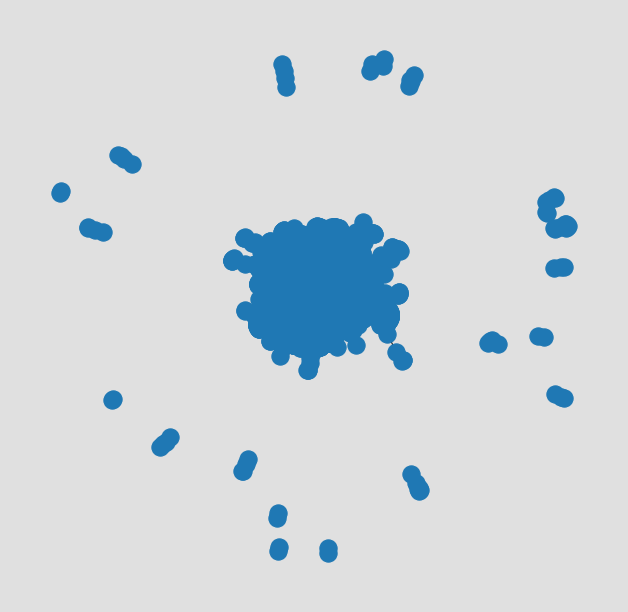

In [96]:
pos = nx.spring_layout(G)
plt.figure(figsize=(11,11), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, with_labels=False)
plt.axis('off')
plt.show()

## Playing around with Coloring and Attributes

The two graphs below this markdown section are areas where I am playing with the colors of the network. This way I learn how to color nodes. Also, I learn how to create a subgraph using `nx.ego_graph` 

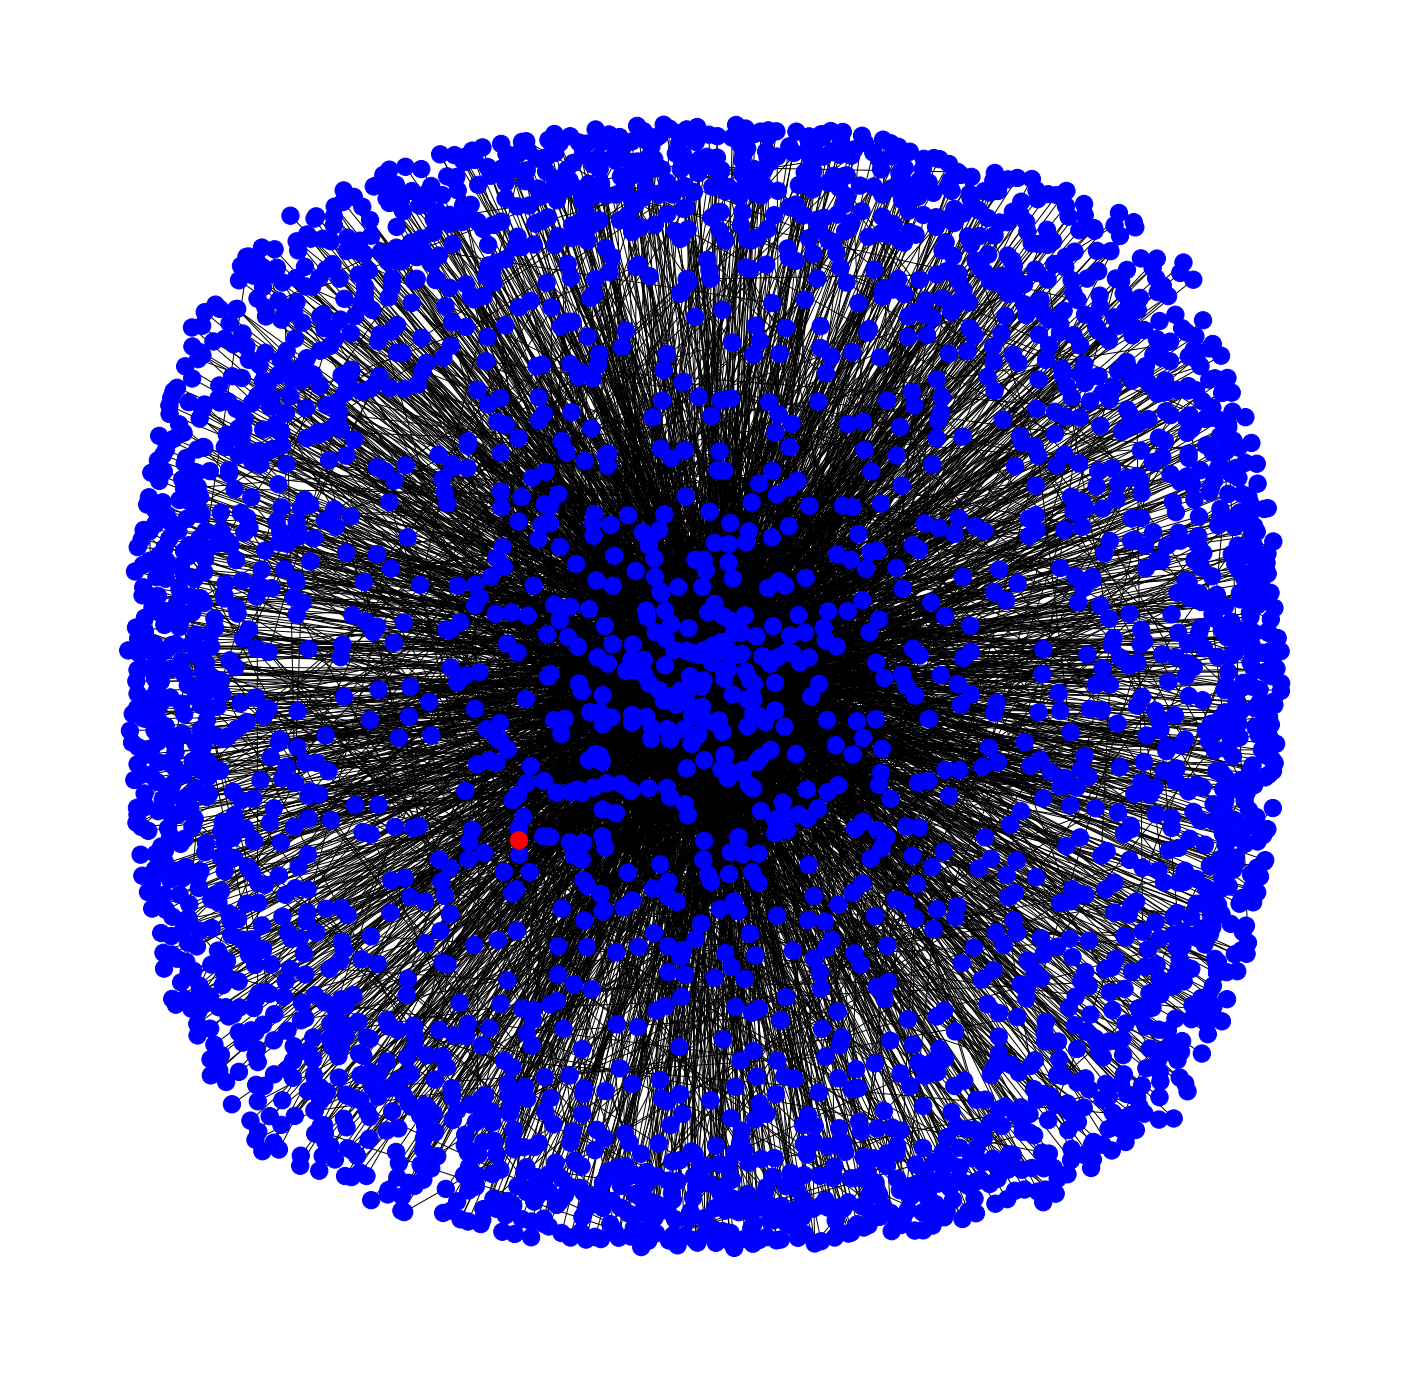

In [97]:
plt.figure(figsize=(25,25))
# This adds spacing between the nodes with k (base=0.1)
pos = nx.spring_layout(G, k=0.15, iterations=20)
# Set the color of every node to blue except for P22681 which I set to to red
color_map = ['red' if node == "P22681" else "blue" for node in G]
nx.draw_networkx(G, pos, node_color = color_map, with_labels=False)
plt.axis('off')
plt.show()

## CBL subgraph

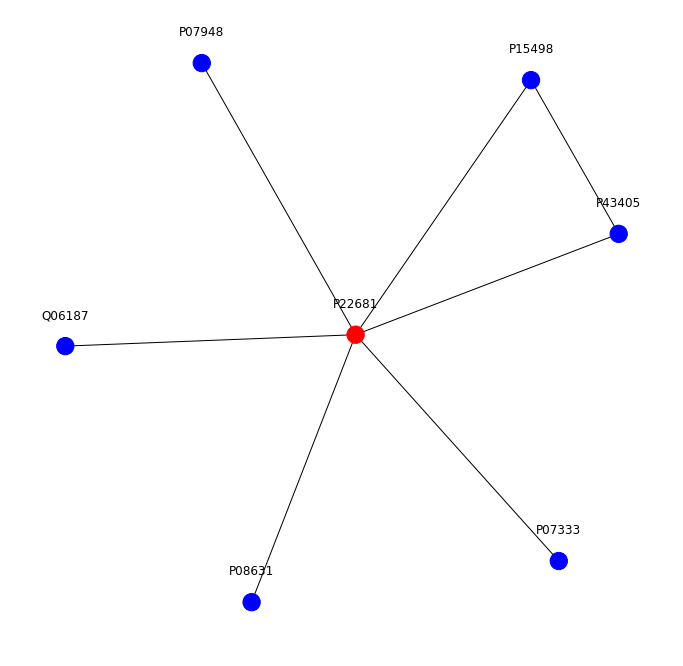

In [98]:
plt.figure(figsize=(12,12))
H = nx.ego_graph(G, "P22681")
pos = nx.spring_layout(H, k=0.1, iterations=20)
color_map = ['red' if node == "P22681" else "blue" for node in H]
nx.draw_networkx(H, pos, node_color = color_map, with_labels=False)

club_labs = [node for node in H]
club = dict(zip(club_labs, club_labs))

for l in pos:  # raise text positions
    pos[l][1] += 0.1  # probably small value enough
nx.draw_networkx_labels(H, pos, labels=club)
plt.axis('off')
plt.show()

## Playing Around
Trying the `nx.draw_circular`, `_spring`, and `_spectral`

## Circular Graph

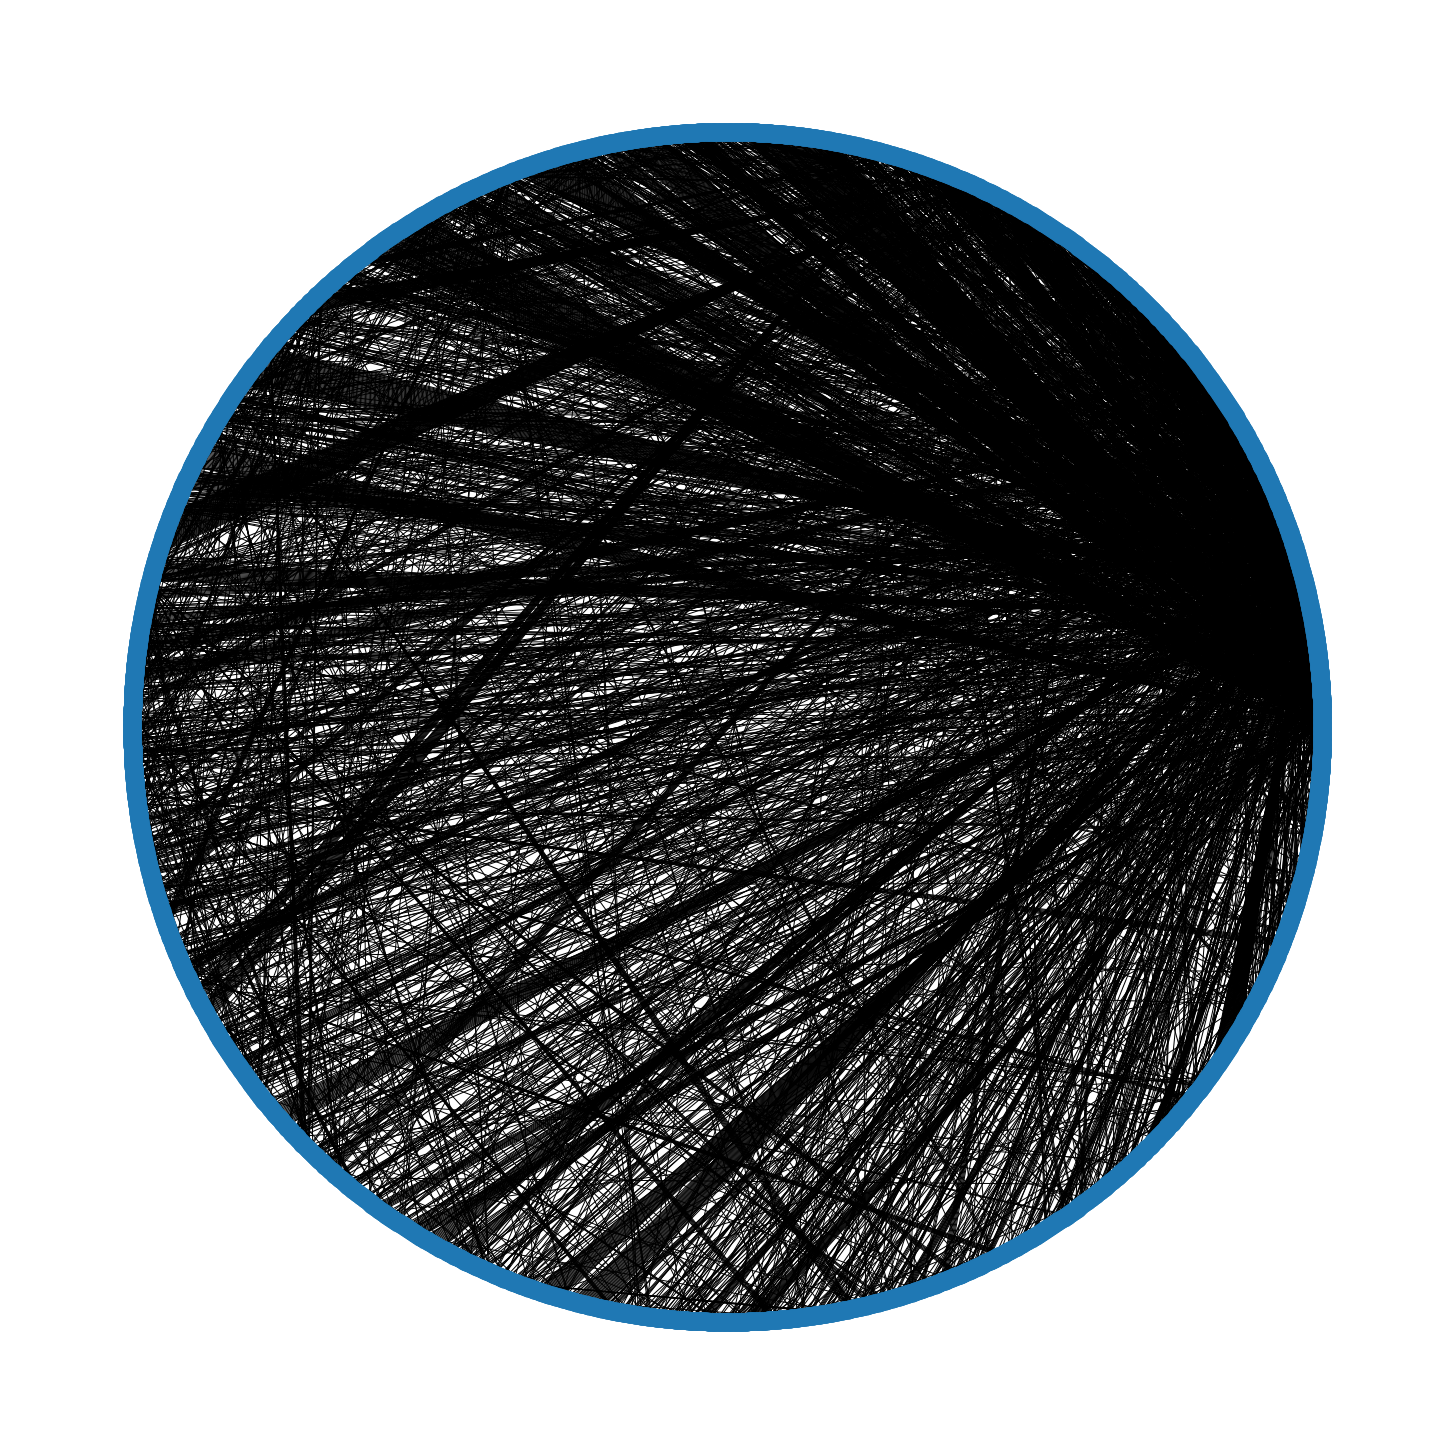

In [99]:
plt.figure(figsize=(20,20), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_circular(G)
plt.axis('off')
plt.show()

## Spring Graph

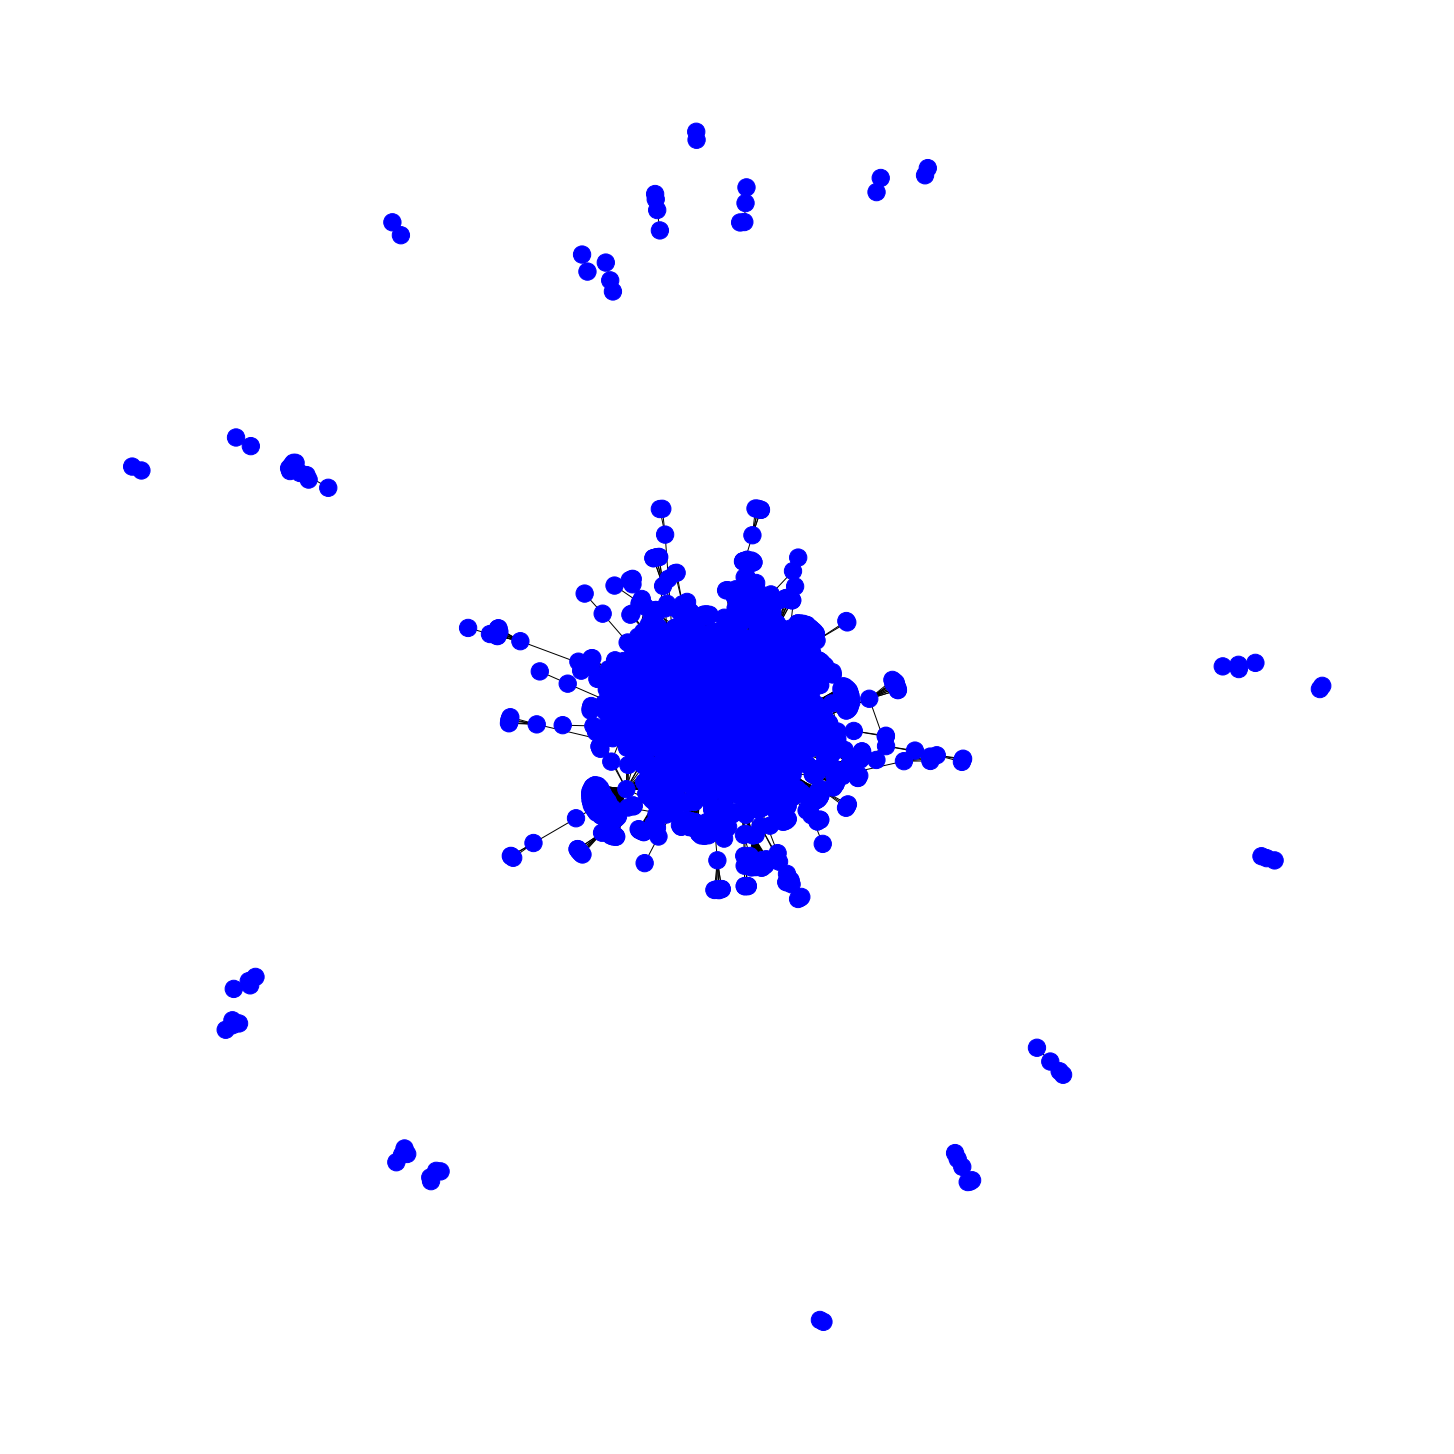

In [100]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=0.15, iterations=20)
color_map = ['red' if node == "P22681" else "blue" for node in G]
nx.draw_spring(G, node_color=color_map)
plt.axis('off')
plt.show()

## Spectral Graph

Still have to figure out stuff for the spectral so I can make it look nicer

In [101]:
G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
nx.draw_spectral(G)
plt.axis("off")
plt.show()

## Pulling out highly connected subnetworks

I will use a sorting function by degrees to pull out a high subset.

In [102]:
sub_networks = sorted(dict(G.degree()))[0:10]
G.nodes(sub_networks)

TypeError: unhashable type: 'list'

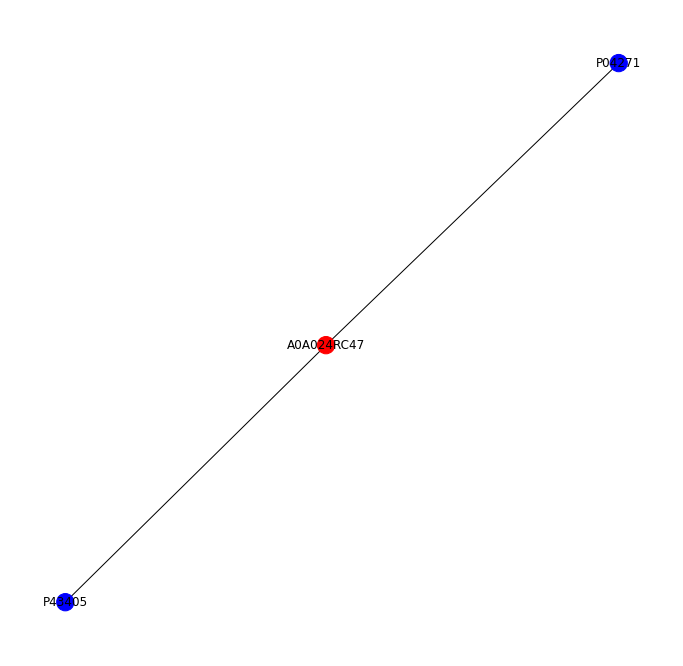

In [103]:
plt.figure(figsize=(12,12))
FG = nx.ego_graph(G, sub_networks[0])
position = nx.spring_layout(FG, k=0.1, iterations=20)
color_map = ['red' if node in sub_networks[0] else "blue" for node in FG]
nx.draw_networkx(FG, position, node_color = color_map, with_labels=False)

club_labs2 = [node for node in FG]
club2 = dict(zip(club_labs2, club_labs2))

for l in pos:  # raise text positions
    pos[l][1] += 0.1  # probably small value enough
nx.draw_networkx_labels(FG, position, labels=club2)
plt.axis('off')
plt.show()

## Pulling out Degrees from the nodes

This will be how I can access the degrees within the nodes

In [104]:
# Create a dict that will house all of the nodes and degree info
node_dict = {}
for i,v in [(node, val) for node,val in G.degree()]:
    node_dict[i] = v

# Then sort the values, so we get the highest degree nodes at the top
sort_values_degrees = sorted(node_dict.values(), reverse=True)

# Create the new sorted dict with the appropriate keys and values.
degrees_prot_sorted = {}
for v in sort_values_degrees:
    for k in node_dict.keys():
        if node_dict[k] == v:
            degrees_prot_sorted[k] = v

# Show the new sorted dict
degrees_prot_sorted

{'P16401': 182,
 'Q9H257': 146,
 'Q02930': 133,
 'Q8NEC5': 115,
 'Q8NI38': 112,
 'Q13422': 101,
 'P08631': 90,
 'O95231': 88,
 'P30273': 77,
 'Q9P2A4': 73,
 'P19397': 73,
 'P59046': 72,
 'O43586': 63,
 'P04271': 60,
 'Q07325': 58,
 'P01375': 54,
 'Q9Y4H4': 53,
 'P54852': 52,
 'Q9BXN2': 50,
 'Q8TB24': 48,
 'P43405': 47,
 'P41220': 47,
 'Q96FZ5': 47,
 'Q92608': 45,
 'Q6XD76': 45,
 'Q9HC29': 44,
 'P35408': 42,
 'P32121': 42,
 'Q96MF2': 41,
 'P07948': 41,
 'O14526': 40,
 'Q13571': 38,
 'P27918': 38,
 'Q8N386': 38,
 'P11215': 38,
 'Q8NF50': 37,
 'Q9HBI0': 36,
 'P04233': 36,
 'P26951': 35,
 'P34910': 32,
 'O60711': 31,
 'Q7L591': 31,
 'P29350': 30,
 'Q9NS75': 30,
 'Q96QH2': 29,
 'P14598': 29,
 'Q9NR55': 29,
 'Q86UF1': 28,
 'P05107': 28,
 'P26447': 28,
 'Q9UIA0': 26,
 'O60603': 25,
 'Q8IUN9': 25,
 'P15498': 25,
 'Q96A37': 24,
 'Q13094': 23,
 'P12314': 23,
 'P09917': 22,
 'Q06187': 22,
 'O00206': 22,
 'Q13651': 22,
 'P20138': 22,
 'Q8N6G5': 22,
 'Q9UBR2': 20,
 'P41218': 20,
 'Q9NNX6': 20,
 'P1

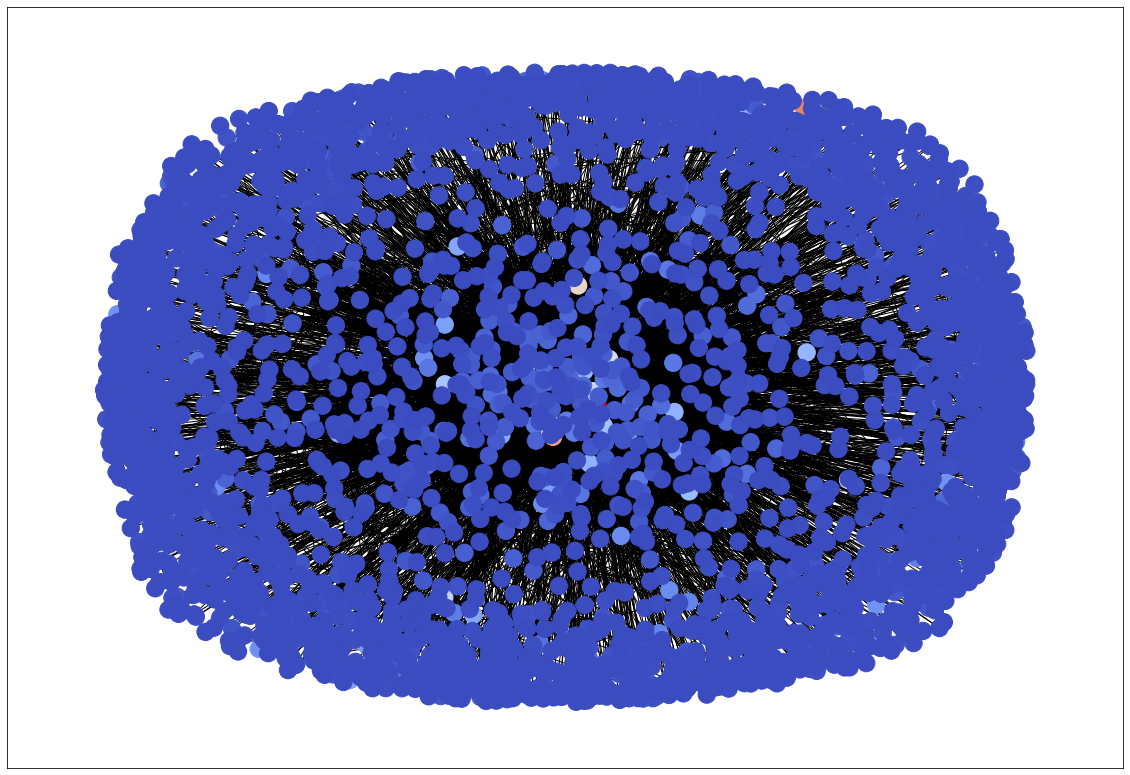

In [105]:
from pylab import rcParams
import matplotlib as mpl


# Pull out the top10 highest degree nodes 
top10_highest_degree_prots = list(degrees_prot_sorted.keys())[0:10]

plt.figure(figsize=(20,14))

low, *_, high = sorted(node_dict.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
position = nx.spring_layout(G, k=0.15, iterations=20)

nx.draw_networkx(G,
       pos=position,
       node_color=[mapper.to_rgba(i) for i in degrees_prot_sorted.values()],
       with_labels=False)
plt.show()


In [106]:
unique_degrees = np.unique(np.array(list(degrees_prot_sorted.values())))

In [107]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

low, low2, mid, mid2, high, highest = list(chunks(unique_degrees, 10))

In [108]:
print(low, low2, mid, mid2, high, highest, sep="\n")

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]
[22 23 24 25 26 28 29 30 31 32]
[35 36 37 38 40 41 42 44 45 47]
[48 50 52 53 54 58 60 63 72 73]
[ 77  88  90 101 112 115 133 146 182]


In [109]:
def create_sub_graphs(lst, n, node_dict):
    """Generate multiple subnetworks categorized by degrees"""
    low = dict()
    low2 = dict()
    mid = dict()
    mid2 = dict()
    high = dict()
    highest = dict()
    name_list = [low, low2, mid, mid2, high, highest]
    chunks_list = list(chunks(lst, n))
    place=0
    for element in chunks_list:
        for v in element:
            for k in node_dict.keys():
                if node_dict[k] == v:
                    name_list[place][k] = v
        place+=1
    
    return low, low2, mid, mid2, high, highest

low_dict, low2_dict, mid_dict, mid2_dict, high_dict, highest_dict = create_sub_graphs(unique_degrees, 10, node_dict)

In [110]:
low_key, low2_key, mid_key, mid2_key, high_key, highest_key = list(low_dict.keys()), list(low2_dict.keys()), list(mid_dict.keys()), list(mid2_dict.keys()), list(high_dict.keys()), list(highest_dict.keys())

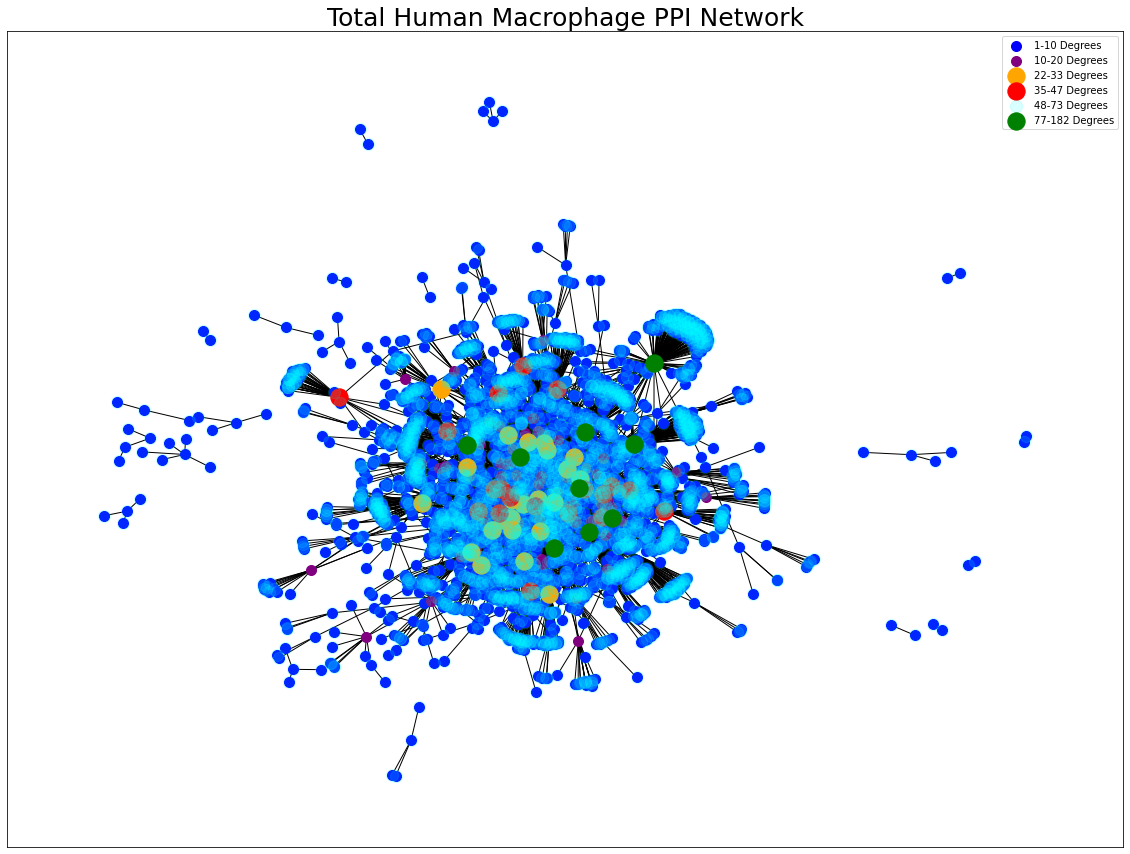

In [111]:
plt.figure(figsize=(20,15))
position = nx.spring_layout(G, iterations=20, seed=18256)

# Low nodes
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=low_key,
                      node_color="blue",
                      label='1-10 Degrees',
                      node_size=100)
# Low2 nodes
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=low2_key,
                      node_color="purple",
                      label='10-20 Degrees',
                      node_size=100)
# mid nodes
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=mid_key,
                      node_color="orange",
                      label='22-33 Degrees')
# mid2 nodes
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=mid2_key,
                      node_color="red",
                      label='35-47 Degrees')
# high
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=low_key,
                      node_color="cyan",
                      label='48-73 Degrees',
                      alpha=0.15,
                      node_size=150)
# highest
nx.draw_networkx_nodes(G,
               pos=position,
               nodelist=highest_key,
                      node_color="green",
                      label='77-182 Degrees')

# Draw the edges between the nodes
nx.draw_networkx_edges(G, pos=position)

# Show the legend
plt.title('Total Human Macrophage PPI Network', fontdict = {"fontsize": 25, "color": "black"})
plt.legend(scatterpoints=1)
plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/human-ppin-degreecolored.png',
           bbox_inches="tight")

## Make a subgraph of all of the top degree nodes

I found a question on stackoverflow https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx

I will follow this general principal to make my subgraph

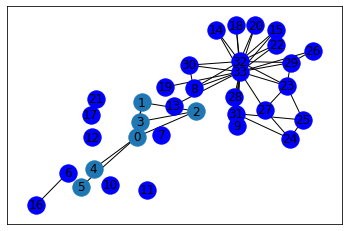

In [112]:
new_G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot']

pos = nx.spring_layout(new_G)
k = new_G.subgraph(res)

plt.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = new_G.subgraph(range(6,new_G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
plt.show()

We have a list `highest_key` which will be used as the node names that will be used to create the subgraph. First we will make that and then figure out what comes out of it.

In the end I didn't really use the code from above. Instead I combined parts of the code above and also the coloring code that I included above that.

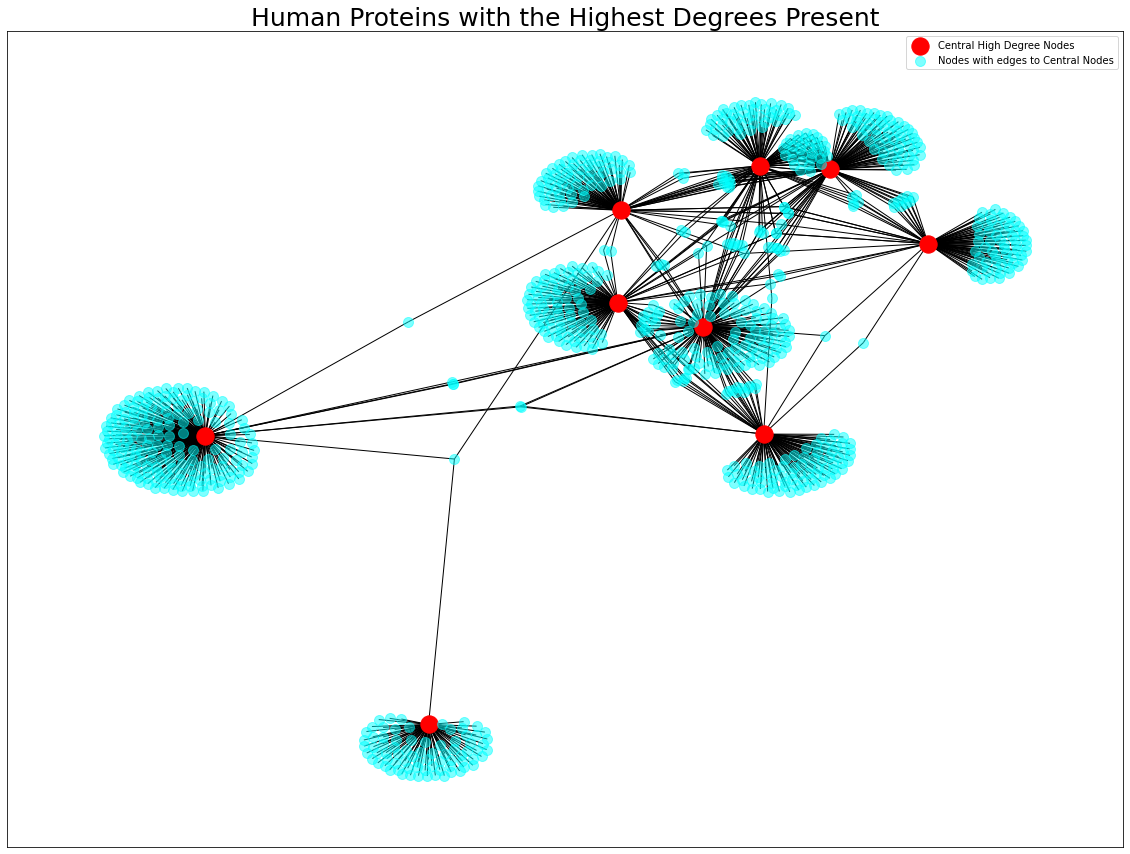

In [113]:
# First pull out all of the edges that are associated with the high degree nodes
subgraph_high = list(G.edges(highest_key))

# Add this mini edge data to a new graph
H = nx.Graph(name="Highest Degree Proteins")
H.add_edges_from(subgraph_high)

# Create a list of all of the non central nodes. Ones that are not in the highest degree list
non_central_nodes = [node_non for node_non in H.nodes() if node_non not in highest_key]

# Create the positions for the graph
pos_h = nx.spring_layout(H, seed=178920)

# Set the size of the figure
plt.figure(figsize=(20,15))

# First we will plot the high degree nodes and give them specific atrributes
nx.draw_networkx_nodes(H, 
                       pos=pos_h, 
                       nodelist=highest_key,
                      node_color="red",
                      label='Central High Degree Nodes')

# Second we draw the secondary nodes that are connected to the main nodes, we make the lighter and smaller nodes
nx.draw_networkx_nodes(H,
                      pos=pos_h,
                      nodelist=non_central_nodes,
                      node_color="cyan",
                      alpha=0.5,
                      node_size=100,
                      label='Nodes with edges to Central Nodes')

# Now add the edges between the nodes
nx.draw_networkx_edges(H, pos=pos_h)

# Matplotlib settings
plt.title('Human Proteins with the Highest Degrees Present', fontdict = {'fontsize': 25, "color":'black'})
plt.legend(scatterpoints=1)
plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/high_degree_node_subgraph.png',
           bbox_inches = "tight")

In [135]:
mtb_paper_right = [
    ('Rv3705c', 'CDKN2A'),
    ('Rv2074', 'HTATSF1'),
    ('Rv2074', 'CAPZB'),
    ('Rv2074', 'KIAA0196'),
    ('Rv2074', 'VPRBP'),
    ('Rv2074', 'FKBP15'),
    ('Rv2074', 'LTV1'),
    ('Rv2074', 'VCP'),
    ('Rv2074', 'ATG4B'),
    ('Rv2074', 'NSFL1C'),
    ('Rv2074', 'IWS1'),
    ('Rv2074', 'NPM1'),
    ('Rv2074', 'RPLP2'),
    ('Rv2074', 'RPLP0'),
    ('LpqN', 'SF1'),
    ('LpqN', 'ERO1L'),
    ('LpqN', 'NAP1L4'),
    ('LpqN', 'GLT25D1'),
    ('LpqN', 'KIAA0907'),
    ('LpqN', 'SOWAHD'),
    ('LpqN', 'VIPAS39'),
    ('LpqN', 'VPS33B'),
    ('LpqN', 'TNRC6B'),
    ('LpqN', 'FMNL1'),
    ('LpqN', 'DIAPH2'),
    ('LpqN', 'PLOD3'),
    ('LpqN', 'MTHFD1'),
    ('LpqN', 'KCTD5'),
    ('LpqN', 'CBL'),
    ('LpqN', 'C22orf28'),
    ('LpqN', 'DDX1'),
    ('LpqN', 'TARDBP'),
    ('LpqN', 'C14orf166'),
    ('LpqN', 'GIGYF2'),
    ('LpqN', 'YTHDF3'),
    ('LpqN', 'EIF4E2'),
    ('LpqN', 'EIF3C'),
    ('LpqN', 'AGO2'),
    ('LpqN', 'SCYL2'),
    ('Rv1984c', 'HECTD1'),
    ('Rv0999', 'SORBS1'),
    ('EspB', 'HNRNPUL1'),
    ('EspB', 'DAZAP1'),
    ('EspB', 'YTHFD1'),
    ('EspB', 'NUP21'),
    ('EspB', 'NUP88'),
    ('PE35', 'NUP153'),
    ('PE35', 'DYNLL1'),
    ('Rv1906c', 'DHPS'),
    ('Rv1906c', 'GLUL'),
    ('Rv1906c', 'EZR'),
    ('Rv3722c', 'CCT3'),
    ('Rv3722c', 'CCT8'),
    ('Rv3722c', 'CCT4'),
    ('Rv3722c', 'CCT2'),
    ('Rv3722c', 'CCT7'),
    ('Rv3722c', 'CCT6A'),
    ('Rv3722c', 'CCT5'),
    ('PPE11', 'TMED10'),
    ('PPE11', 'MOGS'),
    ('Rv2469c', 'AIMP2'),
    ('Rv2469c', 'RARS'),
    ('Rv2469c', 'EPRS'),
    ('Rv2469c', 'MARS'),
    ('Rv2469c', 'RCN2'),
    ('Rv2469c', 'TIMM13'),
    ('Rv2469c', 'TIMM8A'),
    ('Rv2469c', 'OLA1'),
    ('Rv2469c', 'TUFM'),
    ('Rv2469c', 'DICER1'),
    ('Rv2401', 'RPS3A'),
    ('Rv2401', 'USP11'),
    ('Cfp6', 'RLP13'),
    ('Cfp6', 'IPO5'),
    ('Cfp6', 'IFI30'),
    ('Rv3033', 'NAP1L1'),
    ('Rv3033', 'ZC3H7A'),
    ('Rv3033', 'IL16'),
    ('Rv3033', 'PCBP1'),
    ('Rv3033', 'LASP1'),
    ('Rv3668c', 'HCFC1'),
    ('Rv1498a', 'HNRNPA1'),
    ('Rv1074c', 'RPL22'),
    ('Rv1074c', 'PPP6C'),
    ('Rv1074c', 'DLD'),
    ('Rv1074c', 'RBBP5'),
    ('Rv1074c', 'ASH2L'),
    ('Rv1074c', 'DPY30'),
    ('Rv1074c', 'PPP2R1A'),
    ('Rv1074c', 'PPP2CB'),
    ('Rv1074c', 'PPP2R2A'),
    ('Rv1074c', 'HNRNPK'),
    ('ESAT6', 'RAB1A'),
     ('ESAT6', 'RAB1B'),
     ('ESAT6', 'PPOX'),
     ('ESAT6', 'PGRMC1'),
     ('ESAT6', 'PRC1'),
     ('ESAT6', 'PTGES2'),
     ('TB8.4', 'RAB11B'),
     ('TB8.4', 'RAB5A'),
     ('TB8.4', 'LRRFIP1'),
     ('TB8.4', 'NRAS'),
     ('EsxQ', 'HEATR2'),
     ('EsxQ', 'ACBD3'),
     ('EsxQ', 'DCTPP1'),
     ('EsxQ', 'GCN1L1'),
     ('Apa', 'SFPQ'),
     ('Apa', 'CPSF6'),
     ('Apa', 'NUDT21'),
     ('Apa', 'FUBP3'),
     ('Apa', 'FUBP1'),
     ('Apa', 'DNM2'),
     ('Apa', 'VASP'),
     ('Apa', 'EVL'),
     ('Apa', 'EDC4'),
     ('Apa', 'PAICS'),
     ('Apa', 'KHSRP'),
     ('Apa', 'SEC13'),
     ('Apa', 'SEC23A'),
     ('Apa', 'SEC31A'),
     ('Apa', 'SEC24D'),
     ('Apa', 'SEC23B'),
     ('Apa', 'PTPN23'),
     ('Apa', 'DOK3'),
     ('Apa', 'TRIP6'),
     ('Apa', 'PRRC1'),
     ('Apa', 'RBM12'),
     ('Apa', 'NONO'),
     ('Apa', 'PDCD6IP'),
     ('PE25', 'VAT1'),
     ('PE25', 'NSDHL'),
     ('PE25', 'ACSL4'),
     ('PE25', 'ARL8B'),
     ('PE25', 'BAX'),
     ('Rv2491', 'FAM175B'),
     ('Rv2491', 'SCP2'),
     ('EspR', 'H3F3A'),
     ('EspR', 'FBXW11'),
     ('EspR', 'HIST2H3A'),
     ('EspR', 'XRCC5'),
     ('EspR', 'XRCC6'),
     ('LpqR', 'CDC37'),
     ('Rv1804c', 'TANK'),
     ('Rv1804c', 'TUBG1'),
     ('Rv1804c', 'TGFB1I1'),
     ('Rv1804c', 'ACAP1'),
     ('Rv1804c', 'MZT2B'),
     ('Rv1804c', 'TUBGCP3'),
     ('Rv1804c', 'TUBGCP2'),
     ('Rv1804c', 'DERA'),
     ('Rv1804c', 'ALDH16A1'),
     ('Rv1804c', 'STRN'),
     ('Rv1804c', 'STRN3'),
     ('Rv1804c', 'STRN4'),
     ('Rv1804c', 'MOB4'),
     ('Rv1816', 'USP9X'),
     ('Rv1816', 'KBTBD4'),
     ('Rv1816', 'CSNK2A1'),
     ('Rv1816', 'CSNK2B'),
     ('Rv1816', 'ZC3H18'),
     ('Rv1816', 'FUCA1'),
     ('Rv1816', 'PRKDC'),
     ('Rv1827', 'SRRM1'),
     ('Rv1827', 'SRRM2'),
     ('Rv1827', 'RNPS1'),
     ('Rv1827', 'SRSF2'),
     ('Rv1827', 'AHCYL1'),
     ('Rv1827', 'NACA'),
     ('Rv1827', 'EIF5B'),
     ('Rv1827', 'MCM2'),
     ('Rv1827', 'MCM5'),
     ('Rv1827', 'MCM7'),
     ('Rv1827', 'MCM3'),
     ('Rv1827', 'PTMS'),
     ('Rv1827', 'AP3B1'),
     ('Rv1827', 'BLOC1S1'),
     ('Rv1827', 'UBE2O'),
     ('Rv1827', 'SARNP'),
     ('Rv1827', 'PCM1'),
     ('Rv1827', 'BTF3'),
     ('Rv1498a', 'HNRNPA1'),
     ('Rv3668c', 'HCFC1'),
     ('Rv1075C', 'HNRNPK'),
     ('Rv1075C', 'PPP2R2A'),
     ('Rv1075C', 'PPP2CB'),
     ('Rv1075C', 'PPP2R1A'),
     ('Rv1075C', 'DPY30'),
     ('Rv1075C', 'ASH2L'),
     ('Rv1075C', 'RBBP5'),
     ('Rv1075C', 'DLD'),
     ('Rv1075C', 'PPP6C'),
     ('Rv1075C', 'RPL22')
]

mtb_prots = list()
human_prots = list()
for i in mtb_paper_right:
    mtb_prots.append(i[0])
    human_prots.append(i[1])

In [136]:
# Pull out specific prots that are found in both mtb and macrophage
unique_human_from_mtb = list(set(human_prots))
UniA = [i.split('_')[0] for i in macrophage_interaction_protein_database.UniprotName_A]
UniB = [i.split('_')[0] for i in macrophage_interaction_protein_database.UniprotName_B]
for i in unique_human_from_mtb:
    if i in UniA or i in UniB:
        human_in_G.append(i)

G.add_edges_from(mtb_paper_right)

human_prots_total = [i for i in G.nodes if i not in mtb_prots]



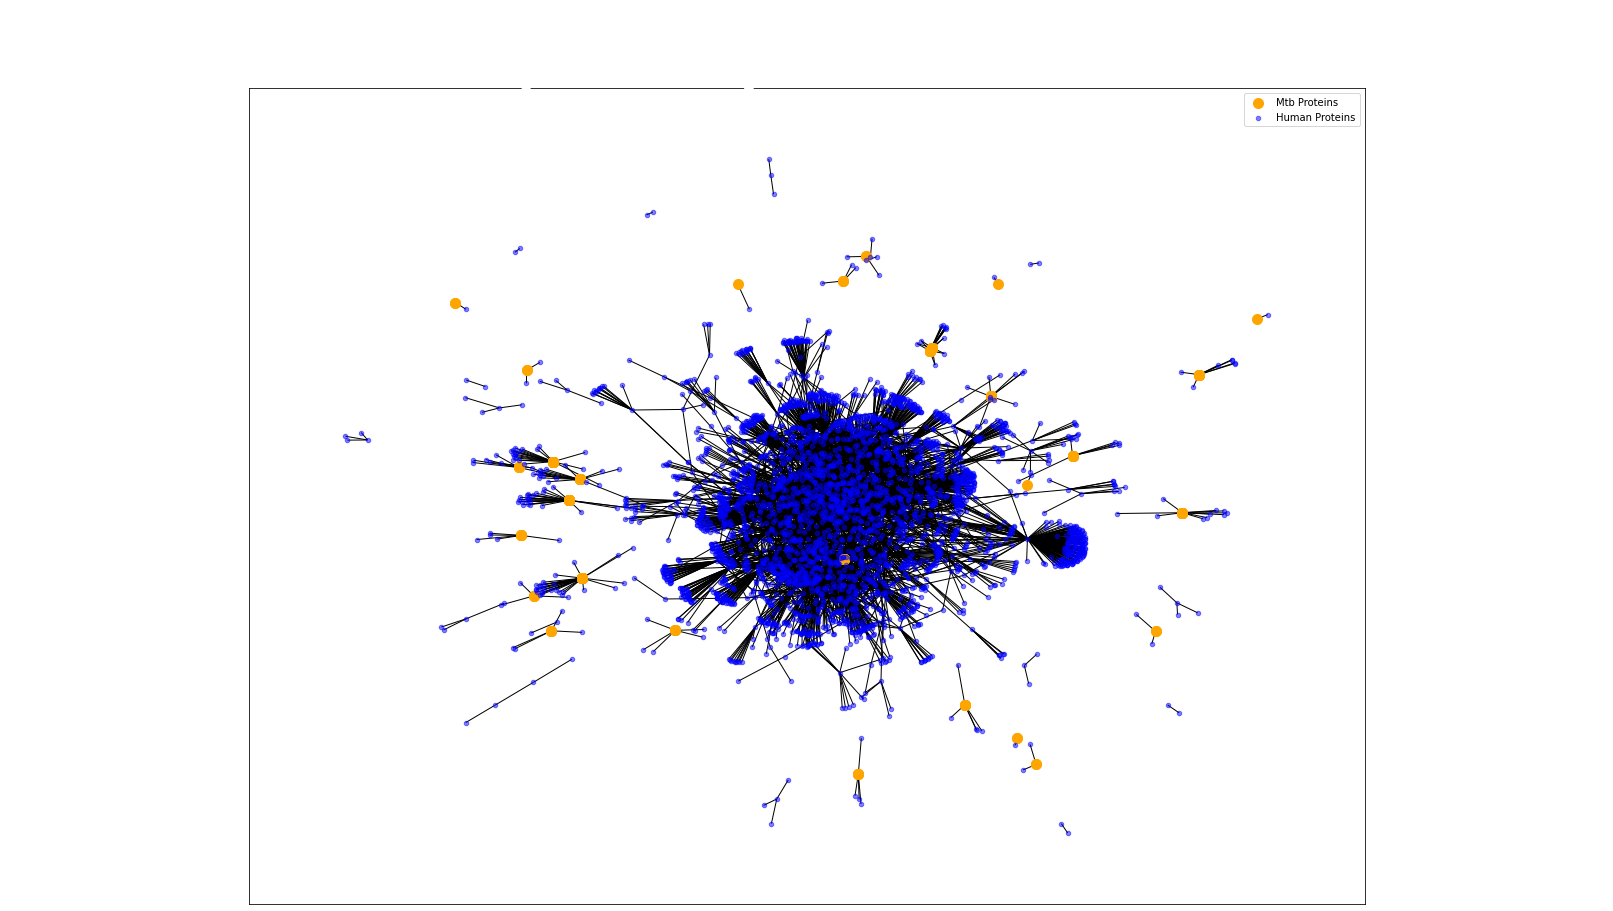

In [116]:
plt.figure(figsize=(20,15))

new_pos = nx.spring_layout(G, iterations=20, seed=1238)

nx.draw_networkx_nodes(G, new_pos,
                      nodelist=mtb_prots,
                      node_size = 100,
                      node_color= "orange",
                      label="Mtb Proteins")
nx.draw_networkx_nodes(G, new_pos,
                      nodelist=human_prots_total,
                      node_size=20,
                      node_color='blue',
                      alpha=0.5,
                      label='Human Proteins')
nx.draw_networkx_edges(G, new_pos)

plt.title('Full Macrophage & Mtb Network', fontdict={'fontsize': 100, 'color': 'white'})
plt.legend(scatterpoints=1)
#plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/full_network.png',
#           bbox_inches='tight')
plt.show()

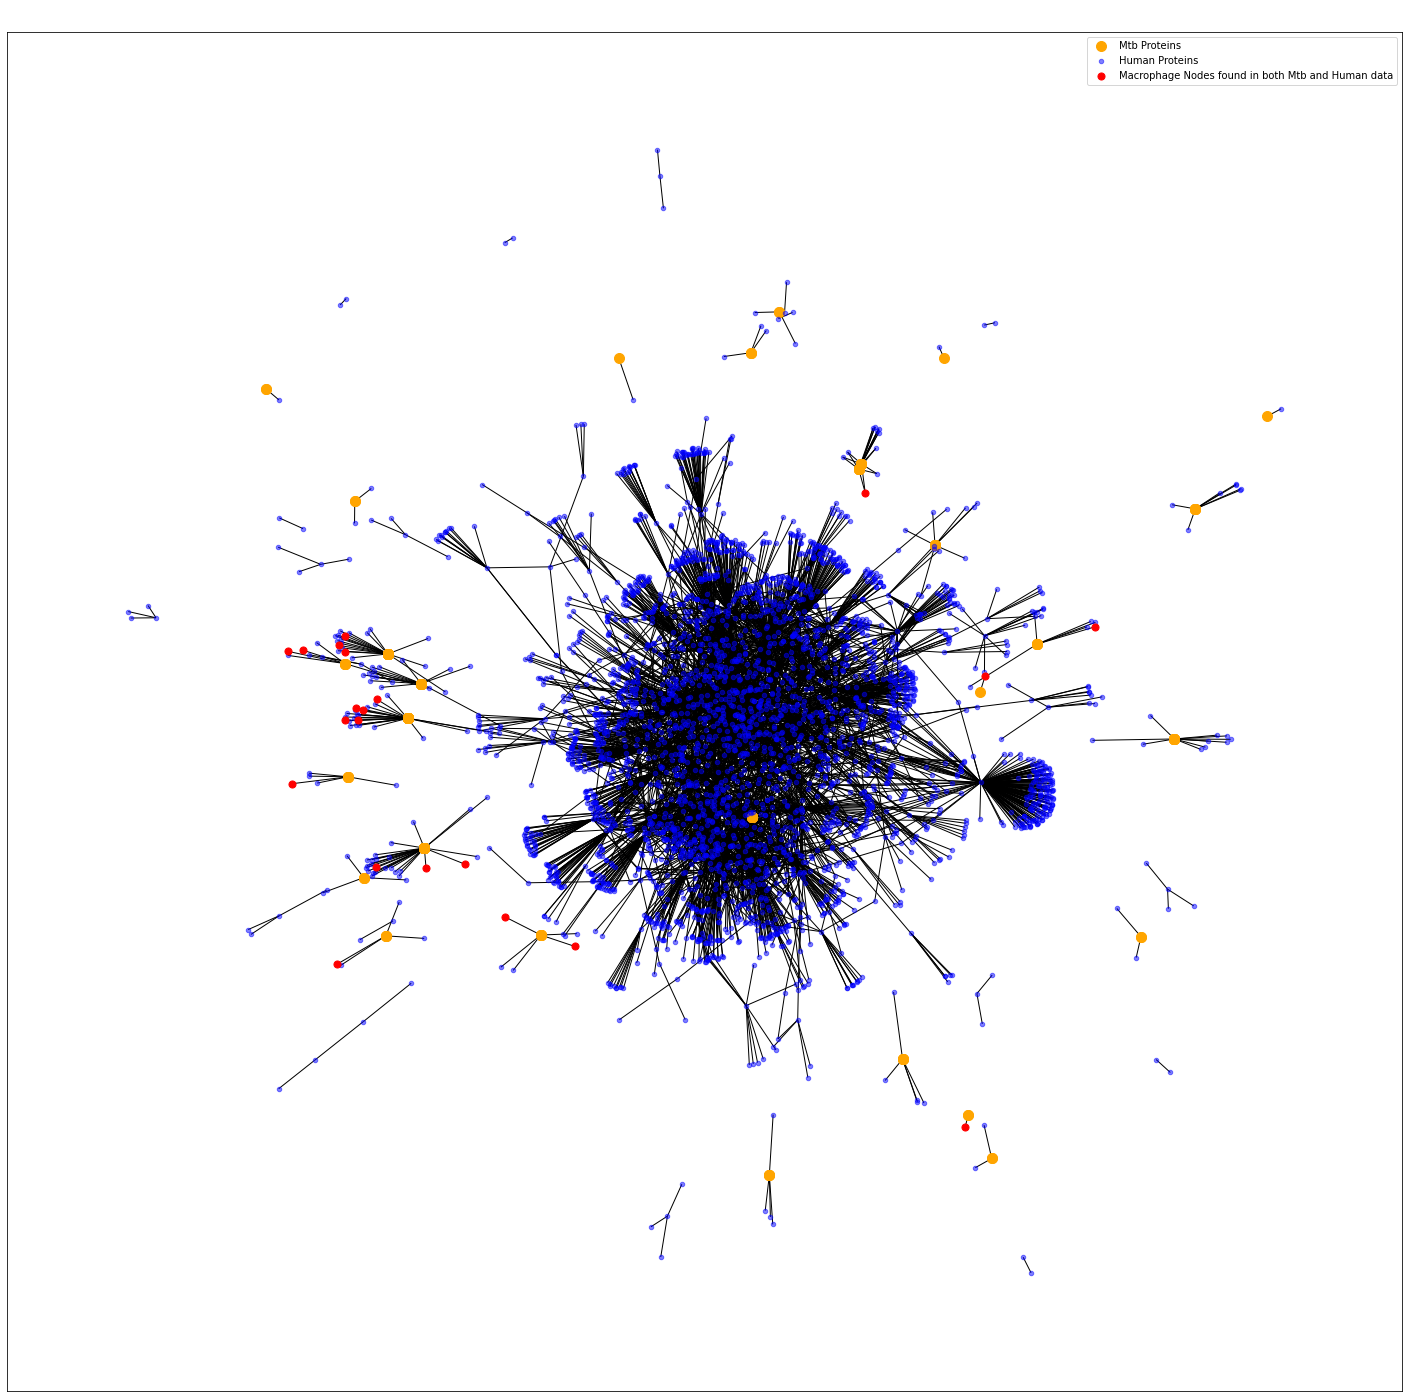

In [139]:
plt.figure(figsize=(25,25))

# pre_pos = {'LpqN': (-10,10)}

# new_pos = nx.spring_layout(G, iterations=20, seed=1238, pos=pre_pos, fixed=pre_pos.keys())
new_pos = nx.spring_layout(G, iterations=20, seed=1238)

nx.draw_networkx_nodes(G, new_pos,
                      nodelist=mtb_prots,
                      node_size = 100,
                      node_color= "orange",
                      label="Mtb Proteins")
nx.draw_networkx_nodes(G, new_pos,
                      nodelist=human_prots_total,
                      node_size=20,
                      node_color='blue',
                      alpha=0.5,
                      label='Human Proteins')
nx.draw_networkx_nodes(G, new_pos,
                      nodelist=human_in_G,
                      node_size=50,
                      node_color='red',
                      label='Macrophage Nodes found in both Mtb and Human data')
nx.draw_networkx_edges(G, new_pos)

plt.title('Full Macrophage & Mtb Network w/ Red Macrophage Nodes', fontdict={'fontsize': 25, 'color': 'white'})
plt.legend(scatterpoints=1)
plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/full_with_interacting.png',
           bbox_inches='tight')

In [152]:
all_connected_nodes = list()
for i in human_in_G:
    for node in nx.node_connected_component(G, i):
        all_connected_nodes.append(node)
            
len(all_connected_nodes)

313

In [143]:
new_G = G.subgraph(all_connected_nodes)

AttributeError: 'Graph' object has no attribute 'info'

In [151]:
new_G.edges()
sub_mtb = [mtb for mtb in mtb_prots if mtb in new_G.nodes]
sub_human = [hum for hum in new_G.nodes if hum not in mtb_prots]

plt.figure(figsize=(10,10))

sub_pos = nx.spring_layout(new_G, iterations=20, seed = 2)

nx.draw_networkx_nodes(new_G, sub_pos,
                      nodelist = sub_mtb,
                      node_color= 'orange',
                      node_size = 100,
                      label='Mtb Proteins')
nx.draw_networkx_nodes(new_G, sub_pos,
                      nodelist = sub_human,
                      node_color = 'blue',
                      node_size = 40,
                      label= 'Human Proteins')
nx.draw_networkx_edges(new_G, sub_pos)

plt.show()

In [171]:
phisto = [('Q6MX51', 'P10145'),
 ('A0A0H3A2T3', 'A0A024RAE4'),
 ('P9WGV3', 'P10145'),
 ('P9WMN3', 'P10145'),
 ('P9WIG7', 'O60603'),
 ('P9WHW9', 'O60603'),
 ('P9WNX3', 'P10145'),
 ('Q7D8M9', 'A0A0S2Z4S4')]


G.add_edges_from(phisto)
phisto_mtb = [i[0] for i in phisto]
phisto_mtb.extend(mtb_prots)

In [172]:
phisto_hum = [i[1] for i in phisto]

sub_phisto = list()
for hum in phisto_hum:
    if hum in G.nodes:
        for node in nx.node_connected_component(G, hum):
            if node not in sub_phisto:
                sub_phisto.append(node)
        
len(sub_phisto)

2993

In [173]:
new_G = G.subgraph(sub_phisto)

In [178]:
sub_mtb = [mtb for mtb in phisto_mtb if mtb in new_G.nodes]
sub_human = [hum for hum in new_G.nodes if hum not in phisto_mtb]

In [202]:
plt.figure(figsize=(20,15))

sub_pos = nx.spring_layout(new_G, iterations=15, seed = 2)

for i in sub_mtb:
    if i not in ['Q7D8M9', 'A0A0H3A2T3']:
        if sub_pos[i][1] > 0:
            sub_pos[i][1] += 0.5
        else:
            sub_pos[i][1] -= 0.2

nx.draw_networkx_nodes(new_G, sub_pos,
                      nodelist = sub_human,
                      node_color = 'cyan',
                      node_size = 76,
                      label= 'Human Proteins',
                      alpha=0.25)
nx.draw_networkx_edges(new_G, sub_pos)
        
nx.draw_networkx_nodes(new_G, sub_pos,
                      nodelist = sub_mtb,
                      node_color= 'orange',
                      node_size = 100,
                      label='Mtb Proteins')
nx.draw_networkx_labels(new_G, sub_pos, labels=mtb_labels)


plt.title('Mtb Proteins present in a continous graph', fontdict = {'fontsize': 25, 'color': 'white'})
plt.legend(scatterpoints=1)
plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/continuous_mtb_nodes.png',
           bbox_inches='tight')

In [195]:
copy_sub_mtb = sub_mtb.copy()

In [183]:
mtb_labels = dict(zip(sub_mtb, sub_mtb))

In [198]:
copy_sub_mtb.remove('Q7D8M9')
copy_sub_mtb.remove('A0A0H3A2T3')
copy_sub_mtb

['Q6MX51', 'P9WGV3', 'P9WMN3', 'P9WIG7', 'P9WHW9', 'P9WNX3']

In [200]:
alternate_sub = list()

for mtb in copy_sub_mtb:
    for node in nx.node_connected_component(G, mtb):
        if node not in alternate_sub:
            alternate_sub.append(node)
            
len(alternate_sub)

2989

In [208]:
len(nx.node_connected_component(G, 'P9WNX3'))

2989